In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
diab_data = pd.read_csv("diabetes2.csv")
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diab_data.shape

(768, 9)

In [5]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diab_data.describe(percentiles = (.25, .50, .75, .90, .99))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000
99%,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diab_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Exploratory Data Analysis

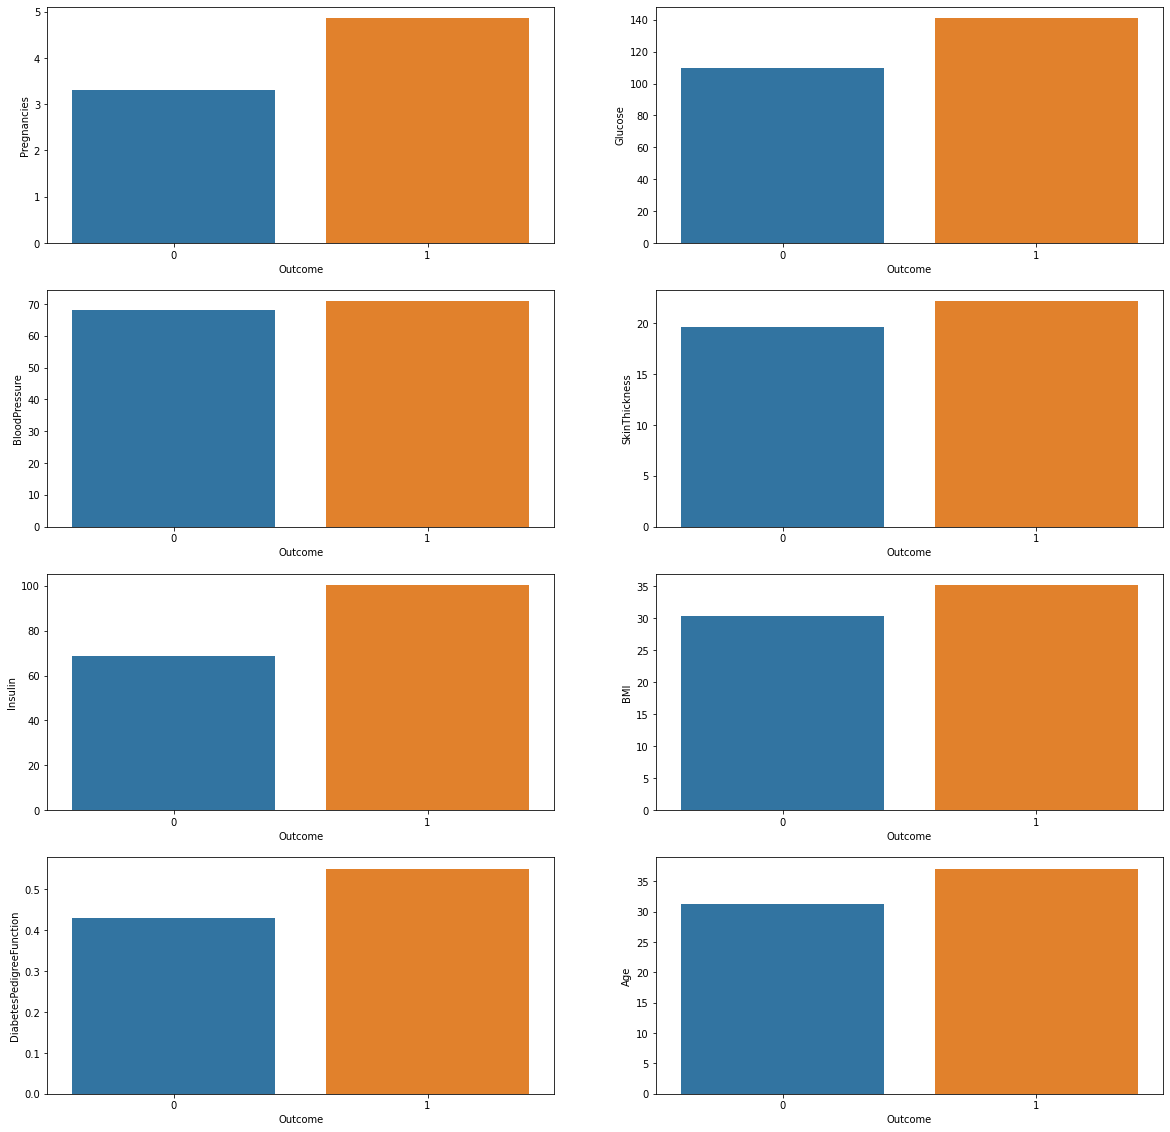

In [8]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.barplot(x=diab_data.Outcome, y=diab_data.Pregnancies, ci=None)
plt.subplot(4,2,2)
sns.barplot(x=diab_data.Outcome, y=diab_data.Glucose, ci=None)
plt.subplot(4,2,3)
sns.barplot(x=diab_data.Outcome, y=diab_data.BloodPressure, ci=None)
plt.subplot(4,2,4)
sns.barplot(x=diab_data.Outcome, y=diab_data.SkinThickness, ci=None)
plt.subplot(4,2,5)
sns.barplot(x=diab_data.Outcome, y=diab_data.Insulin, ci=None)
plt.subplot(4,2,6)
sns.barplot(x=diab_data.Outcome, y=diab_data.BMI, ci=None)
plt.subplot(4,2,7)
sns.barplot(x=diab_data.Outcome, y=diab_data.DiabetesPedigreeFunction, ci=None)
plt.subplot(4,2,8)
sns.barplot(x=diab_data.Outcome, y=diab_data.Age, ci=None)
plt.subplot(4,2,8)
plt.show()

#### Correlation

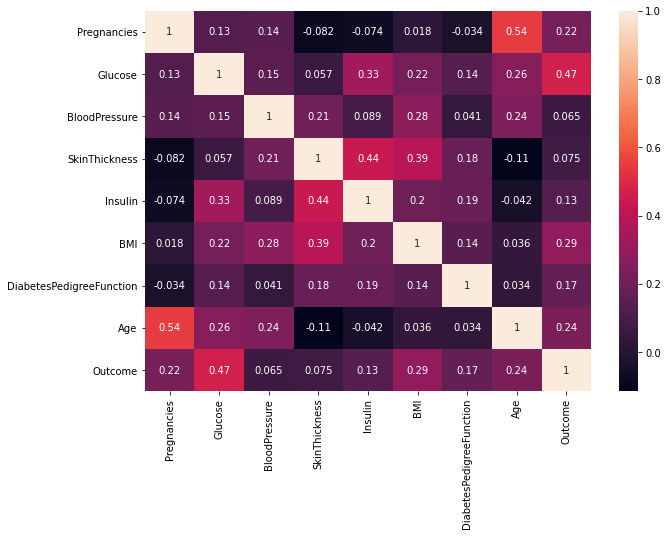

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(diab_data.corr(), annot=True)
plt.show()

### Data Preparation

In [10]:
diab_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = diab_data.drop(["Outcome"], axis=1)

In [13]:
y = diab_data["Outcome"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

### Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf_m = RandomForestClassifier(random_state = 42, max_depth = 3, n_estimators = 10)

In [18]:
rf_m.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [19]:
rf_m.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [20]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

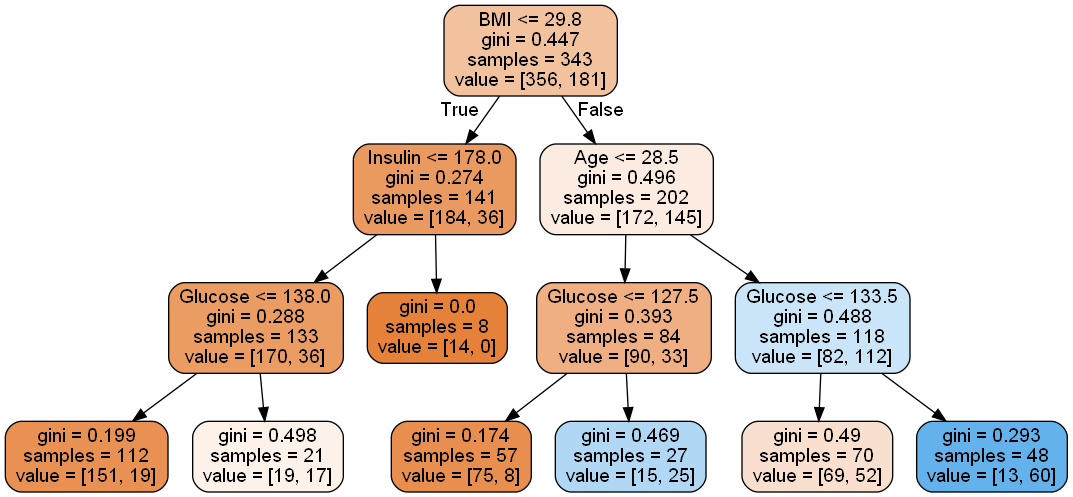

In [21]:
dot_data = StringIO()
export_graphviz(rf_m.estimators_[0], out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

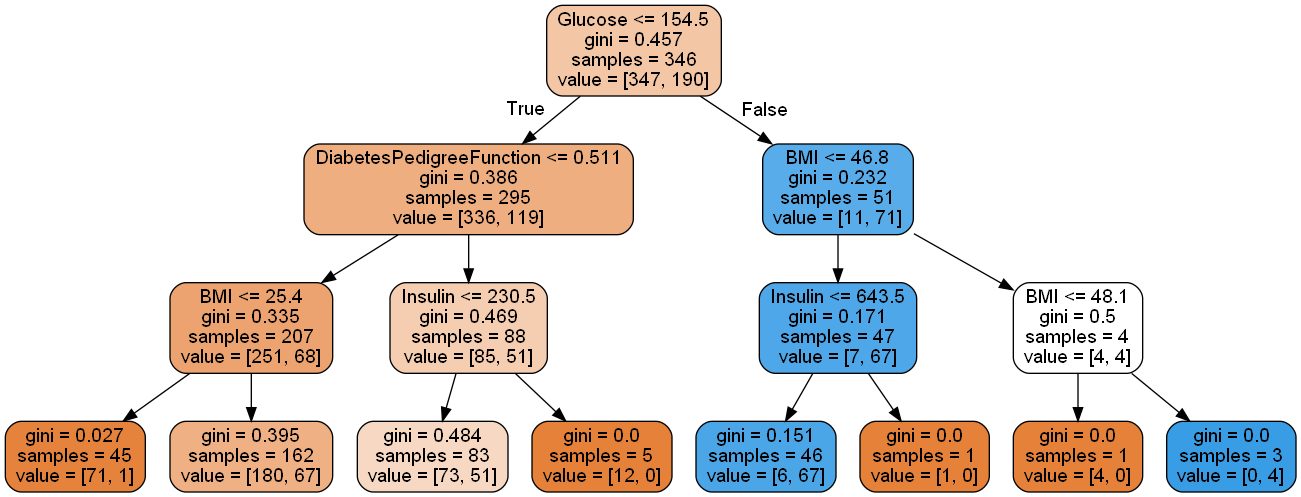

In [22]:
dot_data = StringIO()
export_graphviz(rf_m.estimators_[5], out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Model Evaluation

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
def model_evaluator(x):
    print("Training Data Accuracy: ", accuracy_score(y_train, x.predict(X_train)))
    print("Training COnfusion Matrix: ")
    print(confusion_matrix(y_train, x.predict(X_train)))
    print("-" * 50)
    print("Test Data Accuracy: ", accuracy_score(y_test, x.predict(X_test)))
    print("Test COnfusion Matrix: ")
    print(confusion_matrix(y_test, x.predict(X_test)))

In [25]:
model_evaluator(rf_m)

Training Data Accuracy:  0.8026070763500931
Training COnfusion Matrix: 
[[332  17]
 [ 89  99]]
--------------------------------------------------
Test Data Accuracy:  0.7705627705627706
Test COnfusion Matrix: 
[[136  15]
 [ 38  42]]


#### Hyper-Parameter tuning using Grid Search.

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

In [28]:
parameters = {
    "max_depth" : [1,2,5,10,20,25],
    "min_samples_leaf" : [5,10,15,20,50,100,120],
    "max_features" : [2,3,4],
    "n_estimators" : [10,30,50,100,200,250]
}

In [29]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=parameters, cv=4, n_jobs=-1, verbose=1, scoring="accuracy")

In [31]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 756 candidates, totalling 3024 fits
Wall time: 5min 57s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20, 25],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 15, 20, 50, 100, 120],
                         'n_estimators': [10, 30, 50, 100, 200, 250]},
             scoring='accuracy', verbose=1)

In [32]:
rf_best_esitimator = grid_search.best_estimator_
rf_best_esitimator

RandomForestClassifier(max_depth=20, max_features=2, min_samples_leaf=5,
                       n_estimators=250, n_jobs=-1, random_state=42)

In [33]:
model_evaluator(rf_best_esitimator)

Training Data Accuracy:  0.9068901303538175
Training COnfusion Matrix: 
[[337  12]
 [ 38 150]]
--------------------------------------------------
Test Data Accuracy:  0.8831168831168831
Test COnfusion Matrix: 
[[139  12]
 [ 15  65]]


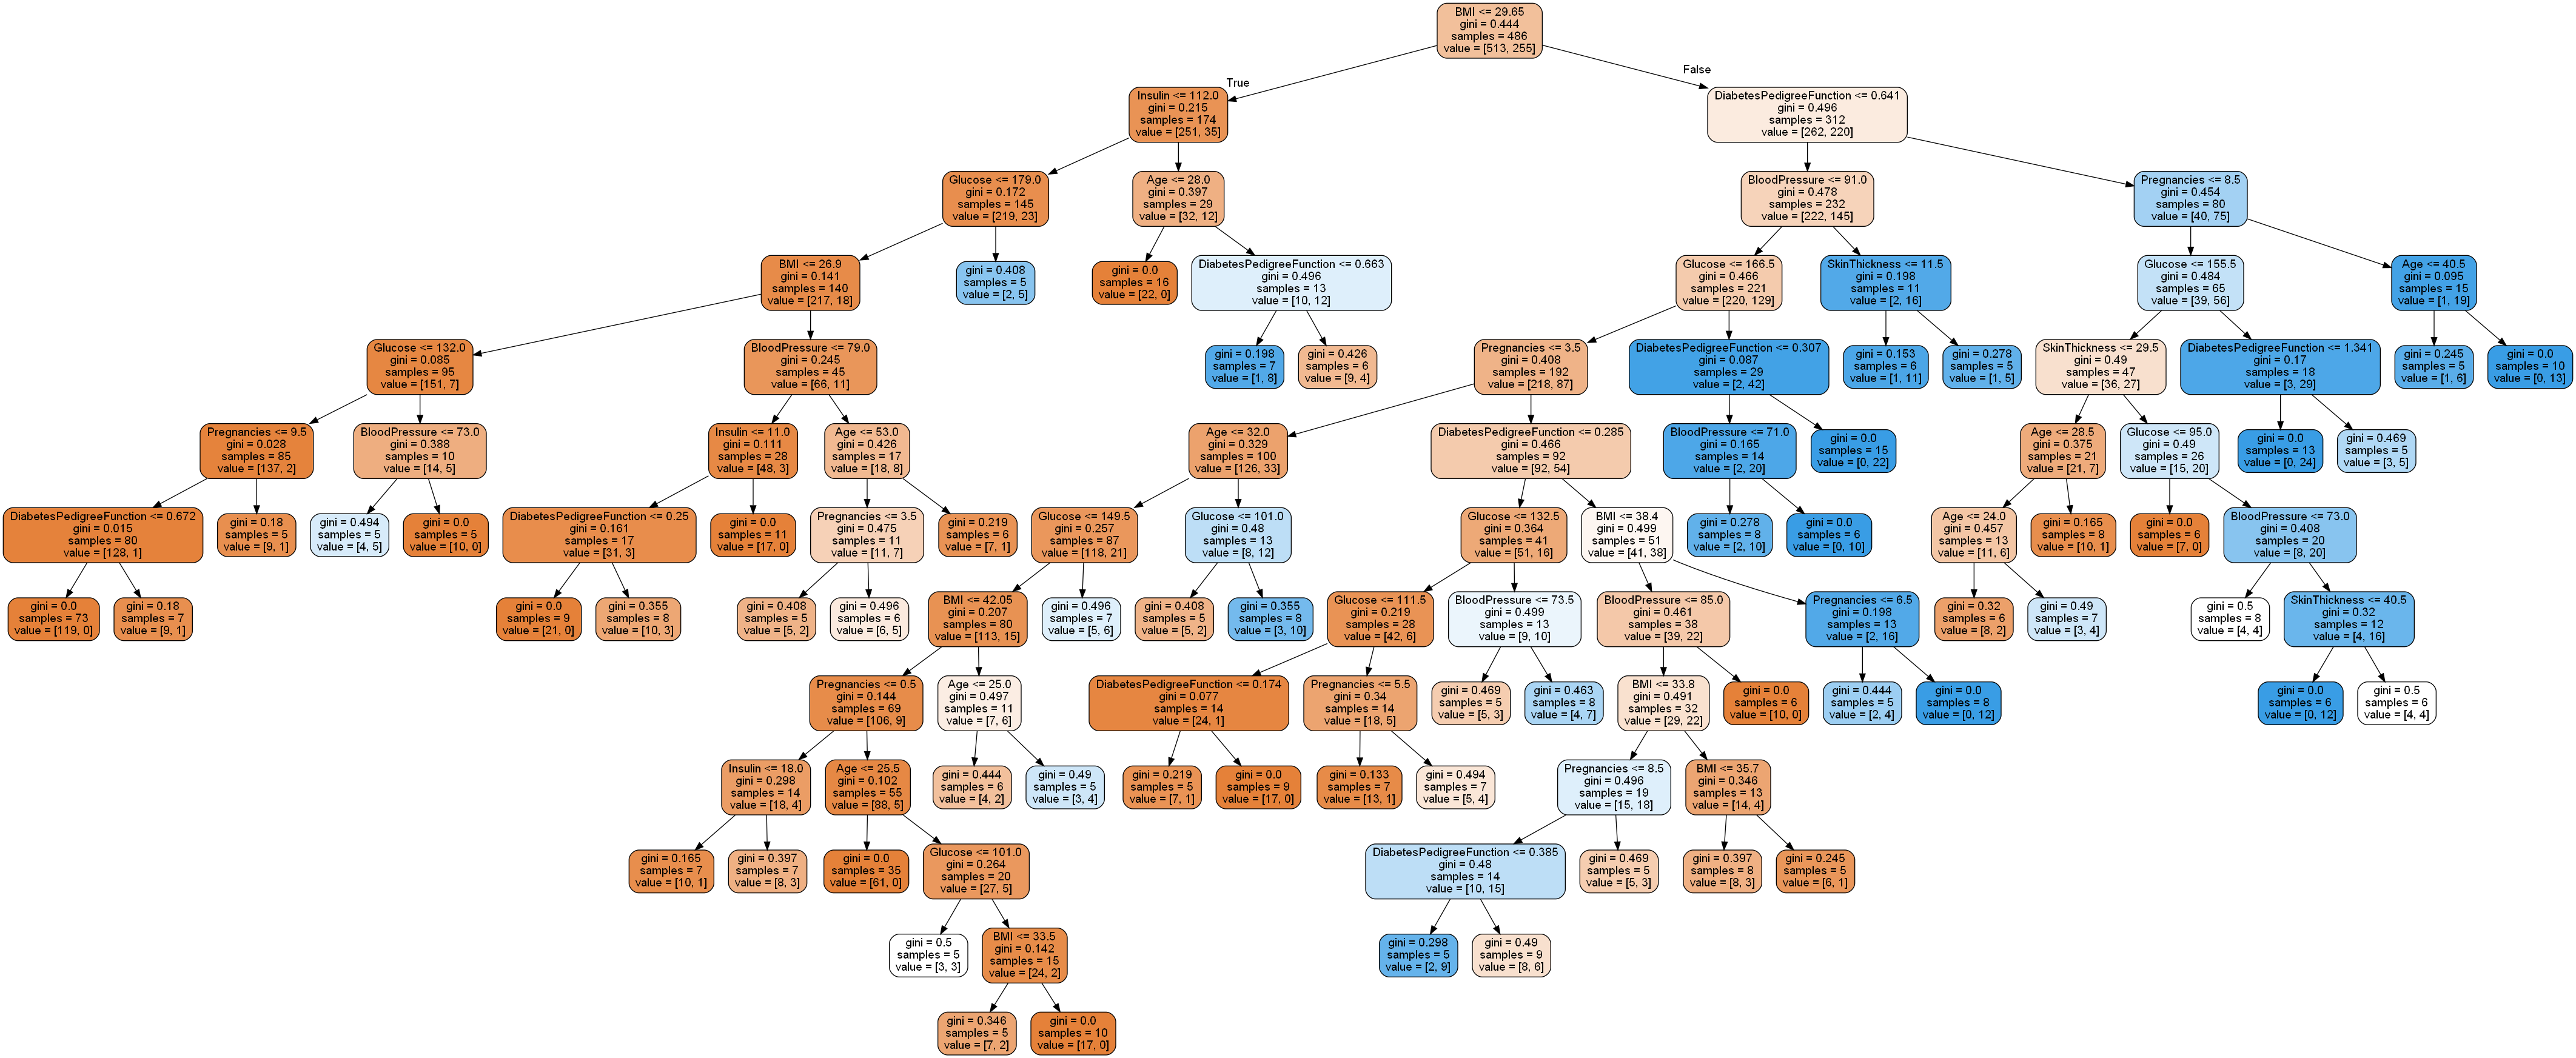

In [34]:
dot_data = StringIO()
export_graphviz(rf_best_esitimator[0], out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

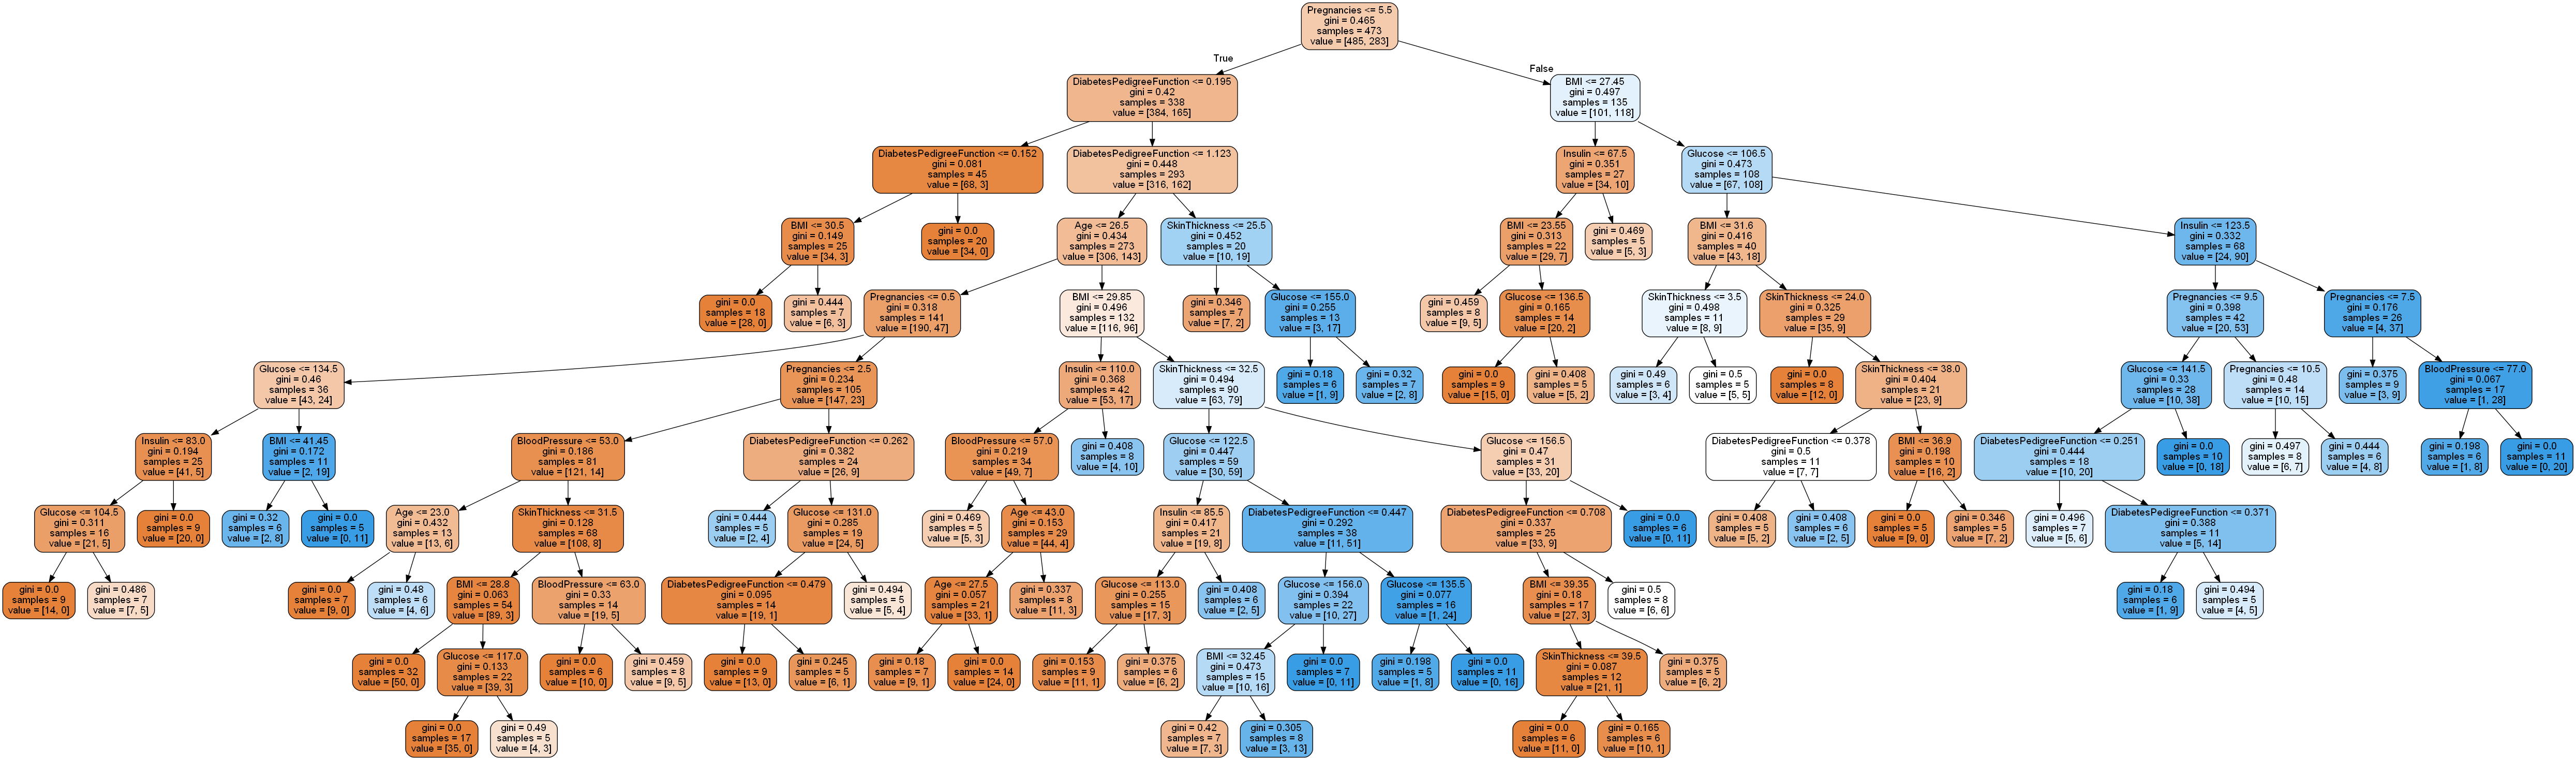

In [35]:
dot_data = StringIO()
export_graphviz(rf_best_esitimator[200], out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### List of important variables in the dataset 

In [36]:
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [37]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [38]:
rf_classifier.feature_importances_

array([0.06849767, 0.36799673, 0.05436703, 0.04676593, 0.06785552,
       0.16947378, 0.07245893, 0.15258441])

In [39]:
important_features = pd.DataFrame({
    "Feature" : X_train.columns,
    "Importance" : rf_classifier.feature_importances_
})

In [40]:
important_features.sort_values(by="Importance", ascending=False)

,Feature,Importance
1,Glucose,0.367997
5,BMI,0.169474
7,Age,0.152584
6,DiabetesPedigreeFunction,0.072459
0,Pregnancies,0.068498
4,Insulin,0.067856
2,BloodPressure,0.054367
3,SkinThickness,0.046766


#### So, From the above dataframe we can say that the subsetting of the dat nodes in th different estimators of the random forests happens according the above importance.